In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport
from wordcloud import WordCloud

import ast

pd.set_option('display.max_columns', None)

C:\Users\sgraf\AppData\Local\Temp\ipykernel_24844\2559859223.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('scr/Datasets/movies_dataset_ETL.csv')

In [3]:
df

id                        title  \
0         862                    Toy Story   
1        8844                      Jumanji   
2       15602             Grumpier Old Men   
3       31357            Waiting to Exhale   
4       11862  Father of the Bride Part II   
...       ...                          ...   
45413   30840                   Robin Hood   
45414  111109          Century of Birthing   
45415   67758                     Betrayal   
45416  227506             Satan Triumphant   
45417  461257                     Queerama   

                                   genres               belongs_to_collection  \
0       ['Animation', 'Comedy', 'Family']            ['Toy Story Collection']   
1      ['Adventure', 'Fantasy', 'Family']                                  []   
2                   ['Romance', 'Comedy']       ['Grumpy Old Men Collection']   
3          ['Comedy', 'Drama', 'Romance']                                  []   
4                              ['Comedy']  ['Father of the Bride Collection']   
...                                   ...                                 ...   
45413      ['Drama', 'Action', 'Romance']                                  []   
45414                           ['Drama']                                  []   
45415     ['Action', 'Drama', 'Thriller']                                  []   
45416                                  []                                  []   
45417                                  []                                  []   

      original_language spoken_languages  \
0                    en           ['en']   
1                    en     ['en', 'fr']   
2                    en           ['en']   
3                    en           ['en']   
4                    en           ['en']   
...                 ...              ...   
45413                en           ['en']   
45414                tl           ['tl']   
45415                en           ['en']   
45416                en               []   
45417                en           ['en']   

                                    production_companies  \
0                            ['Pixar Animation Studios']   
1      ['TriStar Pictures', 'Teitler Film', 'Intersco...   
2                     ['Warner Bros.', 'Lancaster Gate']   
3             ['Twentieth Century Fox Film Corporation']   
4       ['Sandollar Productions', 'Touchstone Pictures']   
...                                                  ...   
45413  ['Westdeutscher Rundfunk (WDR)', 'Working Titl...   
45414                                    ['Sine Olivia']   
45415                        ['American World Pictures']   
45416                                      ['Yermoliev']   
45417                                                 []   

                                    production_countries release_date  \
0                           ['United States of America']   1995-10-30   
1                           ['United States of America']   1995-12-15   
2                           ['United States of America']   1995-12-22   
3                           ['United States of America']   1995-12-22   
4                           ['United States of America']   1995-02-10   
...                                                  ...          ...   
45413  ['Canada', 'Germany', 'United Kingdom', 'Unite...   1991-05-13   
45414                                    ['Philippines']   2011-11-17   
45415                       ['United States of America']   2003-08-01   
45416                                         ['Russia']   1917-10-21   
45417                                 ['United Kingdom']   2017-06-09   

       release_year    revenue    budget     return  popularity  vote_average  \
0              1995  373554033  30000000  12.451801   21.946943           7.7   
1              1995  262797249  65000000   4.043035   17.015539           6.9   
2              1995          0         0   0.000000   11.712900           6.5   
3              1995   81452156  16

# Naturaleza de las variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45418 entries, 0 to 45417
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45418 non-null  int64  
 1   title                  45418 non-null  object 
 2   genres                 45418 non-null  object 
 3   belongs_to_collection  45418 non-null  object 
 4   original_language      45407 non-null  object 
 5   spoken_languages       45418 non-null  object 
 6   production_companies   45418 non-null  object 
 7   production_countries   45418 non-null  object 
 8   release_date           45418 non-null  object 
 9   release_year           45418 non-null  int64  
 10  revenue                45418 non-null  int64  
 11  budget                 45418 non-null  int64  
 12  return                 45418 non-null  float64
 13  popularity             45418 non-null  float64
 14  vote_average           45418 non-null  float64
 15  vo

Todo parece correcto a excepción de la columna release_date

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')

Existen variables que no toma la librería proffiling, así que vamos a asegurar los tipos de variables.

In [6]:
#df.overview = df.overview.astype(str)
#df.title = df.title.astype(str)
#df.genres = df.genres.astype(str)
df.belongs_to_collection = df.belongs_to_collection.astype(str)
df.original_language = df.original_language.astype(str)
df.spoken_languages = df.spoken_languages.astype(str)
df.production_companies = df.production_companies.astype(str)
df.production_countries = df.production_countries.astype(str)
df.status = df.status.astype(str)
df.tagline = df.tagline.astype(str)
#df.director = df.director.astype(str)
df.cast = df.cast.astype(str)

No nos interesa tener datos completamente duplicados. así que  los eliminamos.

In [7]:
df.drop_duplicates(inplace=True)

# Valores Nulos

In [8]:
df.isna().sum().sort_values(ascending=False)

overview                 941
runtime                  246
id                         0
title                      0
director                   0
tagline                    0
status                     0
vote_count                 0
vote_average               0
popularity                 0
return                     0
budget                     0
revenue                    0
release_year               0
release_date               0
production_countries       0
production_companies       0
spoken_languages           0
original_language          0
belongs_to_collection      0
genres                     0
cast                       0
dtype: int64

In [9]:
#df.drop(columns='belongs_to_collection')

# Columnas relevantes

## spoken_languages

spoken_languages

In [10]:
df.replace('[]', np.NaN, inplace=True)

original_language

In [11]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', 'nan', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [12]:
print("original_language:", df['original_language'].isna().sum(), "\nspoken_languages:", df['spoken_languages'].isna().sum())

original_language: 0 
spoken_languages: 3765


Cuantas rows tienen en spoken_languages el original_language?

In [13]:
mask = df.apply(lambda x: True if str(x['spoken_languages']).find(str(x['original_language'])) == -1 else False, axis=1)
df[mask].shape
print("si aparece el idioma original : ", df.shape[0] - df[mask].shape[0], "NO aparece: ", df[mask].shape[0])
print(round(df[mask].shape[0] / df.shape[0] * 100, 2), "%")

si aparece el idioma original :  38835 NO aparece:  6527
14.39 %


In [14]:
df[mask]

id                             title  \
32      78802                  Wings of Courage   
50     117164                    Guardian Angel   
83     188588       Last Summer in the Hamptons   
107     96357      Headless Body in Topless Bar   
113     43612         Happiness Is in the Field   
...       ...                               ...   
45400   44324           The Untameable Whiskers   
45401  122036  The Imperceptable Transmutations   
45403   49280                  The One-Man Band   
45404  106807  The Fat and Lean Wrestling Match   
45416  227506                  Satan Triumphant   

                                  genres belongs_to_collection  \
32              ['Romance', 'Adventure']                   NaN   
50       ['Action', 'Thriller', 'Drama']                   NaN   
83                                   NaN                   NaN   
107                            ['Crime']                   NaN   
113                           ['Comedy']                   NaN   
...                                  ...                   ...   
45400                                NaN                   NaN   
45401                                NaN                   NaN   
45403  ['Fantasy', 'Action', 'Thriller']                   NaN   
45404              ['Comedy', 'Fantasy']                   NaN   
45416                                NaN                   NaN   

      original_language spoken_languages  \
32                   fr           ['en']   
50                   en              NaN   
83                   en              NaN   
107                  en              NaN   
113                  en           ['fr']   
...                 ...              ...   
45400                fr              NaN   
45401                fr              NaN   
45403                fr           ['xx']   
45404                fr           ['xx']   
45416                en              NaN   

                                    production_companies  \
32                              ['Iwerks Entertainment']   
50                                                   NaN   
83                                                   NaN   
107                                                  NaN   
113    ['France 2 Cinéma', 'France 3 Cinéma', 'Studio...   
...                                                  ...   
45400                              ['Star Film Company']   
45401                              ['Star Film Company']   
45403                              ['Star Film Company']   
45404                                      ['Star-Film']   
45416                                      ['Yermoliev']   

                         production_countries release_date  release_year  \
32     ['France', 'United States of America']   1996-09-18          1996   
50                                        NaN   1994-11-22          1994   
83                                        NaN   1995-11-22          1995   
107                                       NaN   1995-05-20          1995   
113                                ['France']   1995-01-31          1995   
...                                       ...          ...           ...   
45400                              ['France']   1904-03-05          1904   
45401                              ['France']   1904-01-01          1904   
45403                              ['France']   1900-01-01          1900   
45404                              ['France']   1900-01-01          1900   
45416                              ['Russia']   1917-10-21          1917   

       revenue    budget  return  popularity  vote_average  vote_count  \
32           0         0     0.0    0.745542           6.8           4   
50           0         0     0.0    0.595949           6.3           3   
83           0         0     0.0    0.531159           0.0           0   
107          0         0     0.0    0.001346           0.0           0   
113          0  13365000     0.0    1.254885           7.0          23  

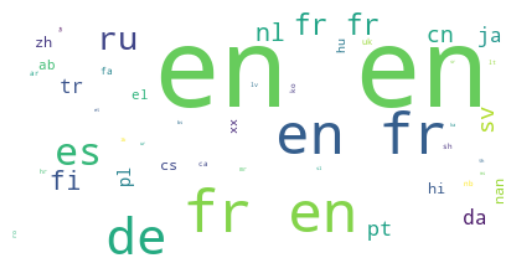

In [15]:
wordcloud = WordCloud(background_color ='white').generate(df[mask]['original_language'].to_string().strip())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

No existe una variedad nivelada de lenguajes, la mayoría están en inglés por lejos. seguido por el francés. No es un buen input para el modelo.

<AxesSubplot: xlabel='original_language', ylabel='Count'>

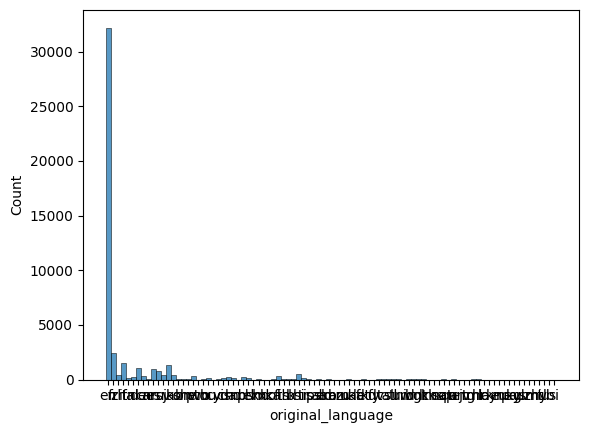

In [16]:
sns.histplot(df,x="original_language")

In [17]:
en = df['spoken_languages'].dropna().apply(ast.literal_eval).explode().value_counts()[0]
other = df['spoken_languages'].dropna().apply(ast.literal_eval).explode().value_counts().iloc[1:].sum()
print("Cantidad en inglés:", en, "otros idiomas:", other)

Cantidad en inglés: 28723 otros idiomas: 24536


## release_year

In [18]:
df['release_year'].describe()

count    45362.000000
mean      1991.882280
std         24.053911
min       1874.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2020.000000
Name: release_year, dtype: float64

Existen fechas anteriores al 1800, y muchas de esas peliculas son errores.

Sólo se van a conservar las fechas a partir del primer cuadrante, pues películas viejas no son muy populares y tienden a tener valores faltantes.

<AxesSubplot: xlabel='release_year', ylabel='popularity'>

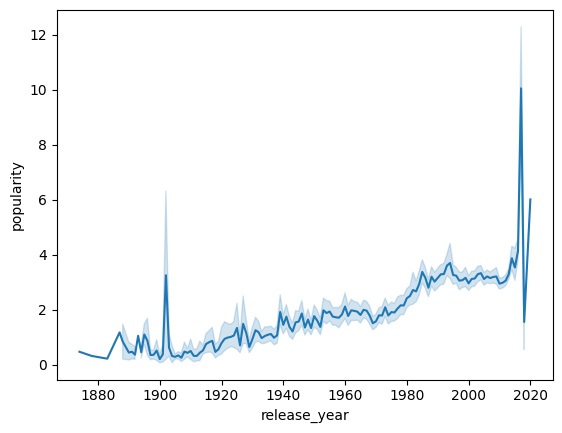

In [19]:
sns.lineplot(df, x='release_year',y='popularity')

<AxesSubplot: xlabel='release_year', ylabel='Count'>

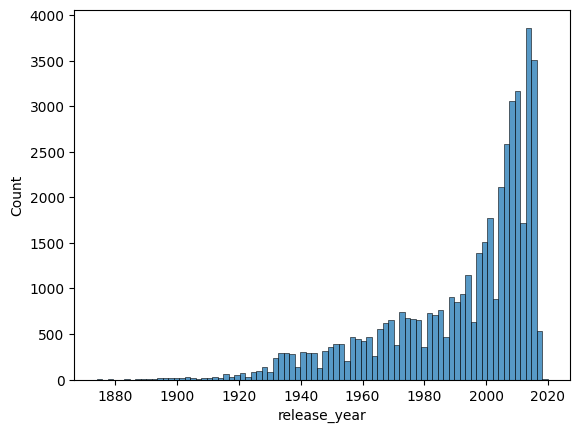

In [20]:
sns.histplot(df.loc[df['release_year'] > 1800], x= 'release_year')

In [21]:
df[df['release_year'] < 1980]

id                             title  \
109       103                       Taxi Driver   
151       649                     Belle de Jour   
196      5967        The Umbrellas of Cherbourg   
256        11                         Star Wars   
385       315     Faster, Pussycat! Kill! Kill!   
...       ...                               ...   
45403   49280                  The One-Man Band   
45404  106807  The Fat and Lean Wrestling Match   
45408   67179         St. Michael Had a Rooster   
45409   84419                  House of Horrors   
45416  227506                  Satan Triumphant   

                                           genres     belongs_to_collection  \
109                            ['Crime', 'Drama']                       NaN   
151                          ['Drama', 'Romance']                       NaN   
196                          ['Drama', 'Romance']                       NaN   
256    ['Adventure', 'Action', 'Science Fiction']  ['Star Wars Collection']   
385                           ['Action', 'Crime']                       NaN   
...                                           ...                       ...   
45403           ['Fantasy', 'Action', 'Thriller']                       NaN   
45404                       ['Comedy', 'Fantasy']                       NaN   
45408                                         NaN                       NaN   
45409           ['Horror', 'Mystery', 'Thriller']                       NaN   
45416                                         NaN                       NaN   

      original_language    spoken_languages  \
109                  en        ['en', 'es']   
151                  fr  ['fr', 'mn', 'es']   
196                  fr              ['fr']   
256                  en              ['en']   
385                  en              ['en']   
...                 ...                 ...   
45403                fr              ['xx']   
45404                fr              ['xx']   
45408                it              ['it']   
45409                en              ['en']   
45416                en                 NaN   

                                    production_companies  \
109    ['Columbia Pictures Corporation', 'Italo/Judeo...   
151    ['Paris Films Productions', 'Five Films', 'Rob...   
196        ['Beta Film', 'Madeleine Films', 'Parc Film']   
256    ['Lucasfilm', 'Twentieth Century Fox Film Corp...   
385                             ['Eve Productions Inc.']   
...                                                  ...   
45403                              ['Star Film Company']   
45404                                      ['Star-Film']   
45408                                                NaN   
45409                             ['Universal Pictures']   
45416                                      ['Yermoliev']   

               production_countries release_date  release_year    revenue  \
109    ['United States of America']   1976-02-07          1976   28262574   
151             ['France', 'Italy']   1967-05-24          1967          0   
196           ['Germany', 'France']   1964-02-19          1964          0   
256    ['United States of America']   1977-05-25          1977  775398007   
385    ['United States of America']   1965-08-06          1965          0   
...                             ...          ...           ...        ...   
45403                    ['France']   1900-01-01          1900          0   
45404                    ['France']   1900-01-01          1900          0   
45408                           NaN   1972-01-01          1972          0   
45409  ['United States of America']   1946-03-29          1946          0   
45416                    ['Russia']   1917-10-21          1917          0   

         budget     return  popularity  vote_average  vote_count  runtime  \
109     1300000  21.740442   14.092713           8.1        2632    114.0   
151           0   0.000000   10.142662           7.3         163    101.0   
196    

In [22]:
df[df['release_year'] < 1980].index

Int64Index([  109,   151,   196,   256,   385,   490,   587,   589,   592,
              607,
            ...
            45397, 45398, 45399, 45400, 45401, 45403, 45404, 45408, 45409,
            45416],
           dtype='int64', length=11757)

In [23]:
df.drop(df[df['release_year'] < 1980].index, inplace=True)

## tagline

Las columnas que se usarán en el modelo deben tener la menor cantidad de campos vacíos. por lo que la columna tagline no es un buen candidato.

In [24]:
df['tagline'].isna().sum() / df.shape[0]

0.0

La mitad de los valores son nulos. Esto se puede dar ya que no todas las películas tienen frases memoriables. de todos modos no son necesarios pues puede ser reemplazado por la columna 'overview' la cual está más completa.

In [25]:
df.drop(columns='tagline', inplace=True)

## overview

C:\Users\sgraf\AppData\Local\Temp\ipykernel_24844\394695855.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wordcloud = WordCloud(background_color ='white').generate(df[mask]['overview'].to_string().strip().lower())


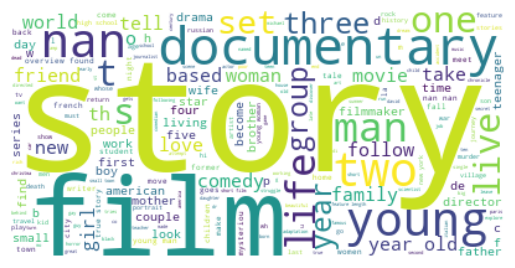

In [26]:
wordcloud = WordCloud(background_color ='white').generate(df[mask]['overview'].to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
wordcloud.words_.__len__()

200

<AxesSubplot: ylabel='Count'>

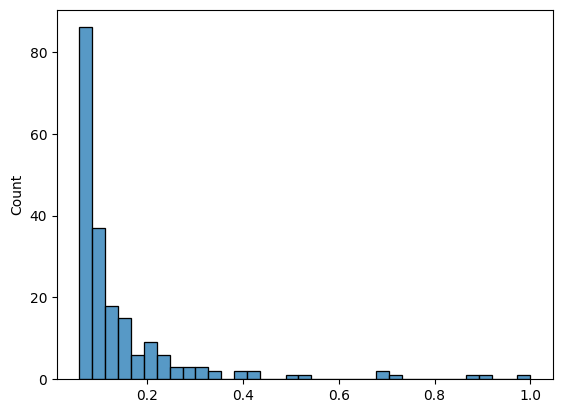

In [28]:
sns.histplot(wordcloud.words_)

Según la anterior gráfica, hay muchas palabras que se repiten pocas veces, y pocas palabras que se repiten muchas veces. 

El siguiente gráfico muestra los valores nulos de cada columna, en los registros en donde overview es nulo.

<AxesSubplot: >

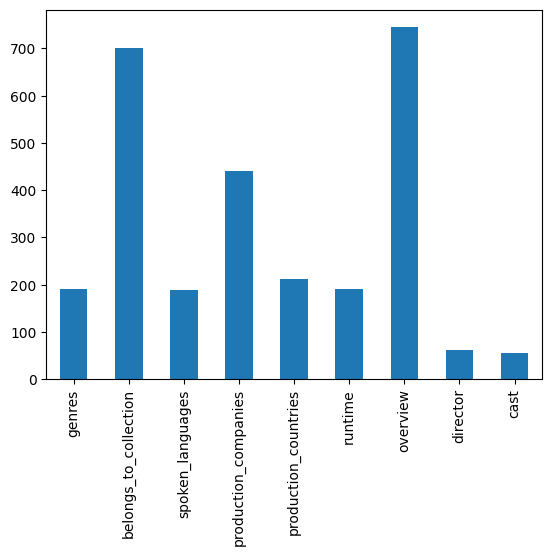

In [29]:
df[df['overview'].isna()].isna().sum()[df.isna().sum()>0].plot(kind='bar')

## director

C:\Users\sgraf\AppData\Local\Temp\ipykernel_24844\2490133223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wordcloud = WordCloud(background_color ='white').generate(df[mask]['director'].to_string().strip().lower())


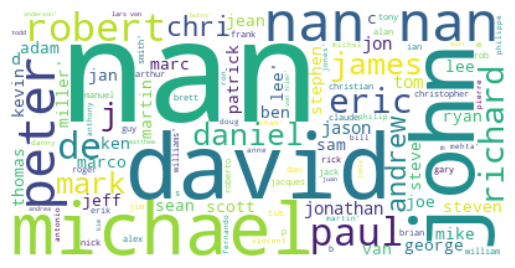

In [30]:
wordcloud = WordCloud(background_color ='white').generate(df[mask]['director'].to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<AxesSubplot: ylabel='Count'>

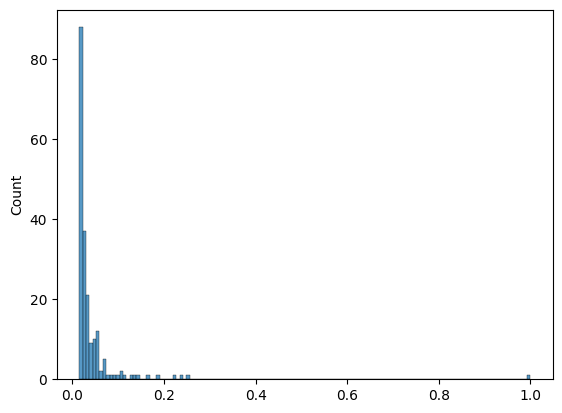

In [31]:
sns.histplot(wordcloud.words_)

## others

Para las demás columnas las revisaré rápidamente con pandas proffiling.

In [32]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Valores Duplicados

## id

Existen valores duplicados de id. Éstos sólo difieren en el parametro 'popularity' y 'director'.

In [33]:
duplicated = df[df.duplicated('id',keep=False)]

In [34]:
print("deben ser",df[df.duplicated('id')].shape[0], "y son", duplicated.shape[0])

deben ser 11 y son 22


In [35]:
for i in duplicated.columns:
    if duplicated.drop_duplicates(subset=i).shape[0] > df[df.duplicated('id')].shape[0]:
        print(i, duplicated.drop_duplicates(subset=i).shape[0])

popularity 22
vote_count 12


In [36]:
duplicated.drop_duplicates(subset='popularity').shape

(22, 21)

Siendo una variable relevante para el modelo de ML, no es recomendable extirpar los datos, por lo que se opta por el valor promedio.

In [37]:
duplicated.head()

id                          title  \
2568   84198           A Place at the Table   
2570   84198           A Place at the Table   
4119   10991  Pokémon: Spell of the Unknown   
4121   10991  Pokémon: Spell of the Unknown   
4364  110428           Camille Claudel 1915   

                                                 genres  \
2568                                    ['Documentary']   
2570                                    ['Documentary']   
4119  ['Adventure', 'Fantasy', 'Animation', 'Action'...   
4121  ['Adventure', 'Fantasy', 'Animation', 'Action'...   
4364                                          ['Drama']   

       belongs_to_collection original_language spoken_languages  \
2568                     NaN                en           ['en']   
2570                     NaN                en           ['en']   
4119  ['Pokémon Collection']                ja           ['en']   
4121  ['Pokémon Collection']                ja           ['en']   
4364                     NaN                fr           ['fr']   

                                   production_companies  \
2568                                                NaN   
2570                                                NaN   
4119  ['TV Tokyo', '4 Kids Entertainment', 'Nintendo...   
4121  ['TV Tokyo', '4 Kids Entertainment', 'Nintendo...   
4364  ['Canal+', 'Arte France Cinéma', '3B Productio...   

              production_countries release_date  release_year   revenue  \
2568  ['United States of America']   2012-03-22          2012         0   
2570  ['United States of America']   2012-03-22          2012         0   
4119                     ['Japan']   2000-07-08          2000  68411275   
4121                     ['Japan']   2000-07-08          2000  68411275   
4364                    ['France']   2013-03-13          2013    115860   

        budget    return  popularity  vote_average  vote_count  runtime  \
2568         0  0.000000    0.501046           6.9           7     84.0   
2570         0  0.000000    1.673307           6.9           7     84.0   
4119  16000000  4.275705   10.264597           6.0         143     93.0   
4121  16000000  4.275705    6.480376           6.0         144     93.0   
4364   3512454  0.032985    0.134014           7.0          20     95.0   

        status                                           overview  \
2568  Released  Using personal stories, this powerful document...   
2570  Released  Using personal stories, this powerful document...   
4119  Released  When Molly Hale's sadness of her father's disa...   
4121  Released  When Molly Hale's sadness of her father's disa...   
4364  Released  Winter, 1915. Confined by her family to an asy...   

                                    director  \
2568  ['Kristi Jacobson', 'Lori Silverbush']   
2570  ['Kristi Jacobson', 'Lori Silverbush']   
4119  ['Michael Haigney', 'Kunihiko Yuyama']   
4121  ['Michael Haigney', 'Kunihiko Yuyama']   
4364                        ['Bruno Dumont']   

                                                   cast  
2568  ['Jeff Bridges', 'Tom Colicchio', 'Mariana Chi...  
2570  ['Jeff Bridges', 'Tom Colicchio', 'Mariana Chi...  
4119  ['Veronica Taylor', 'Rachael Lillis', 'Eric St...  
4121  ['Veronica Taylor', 'Rachael Lillis', 'Eric St...  
4364  ['Juliette Binoche', 'Jean-Luc Vincent', 'Robe...

Para resolverlo simplemente reemplazo los valores en cada columna repetida por la media de la columna popularity. para que entonces sean valores repetidos en todas las variables.

In [38]:
for i in duplicated['id'].unique():
    df.loc[df['id'] == i] = duplicated[duplicated['id'] == i]['popularity'].mean()

In [39]:
df.drop_duplicates(inplace=True)

## title

También  existen duplicados en la columna 'title'.

In [40]:
duplicated = df[df.duplicated('title',keep=False)].sort_values(by='title')

In [41]:
print("deben ser",df[df.duplicated('title')].shape[0], "y son", duplicated.shape[0])

deben ser 1752 y son 3124


Esto significa que existen ids diferentes en los duplicados de un titulo. También con 'production_companies', 'release_date' etc.

In [42]:
for i in duplicated.columns:
    if duplicated.drop_duplicates(subset=i).shape[0] > df[df.duplicated('title')].shape[0]:
        print(i, duplicated.drop_duplicates(subset=i).shape[0])

id 3124
production_companies 2160
release_date 2417
popularity 3111
overview 3085
director 2526
cast 3016


In [43]:
duplicated.iloc[:,:].sort_values(by='title')

id                         title  \
42663  244046.0                    10 Minutes   
24430  118658.0                    10 Minutes   
24120    2965.0  20,000 Leagues Under the Sea   
20872    2966.0  20,000 Leagues Under the Sea   
20673   25038.0                          2:22   
...         ...                           ...   
36121  365065.0                          Zero   
11680    1949.0                        Zodiac   
27697  285135.0                        Zodiac   
37892  351065.0                          Zoom   
11202   14113.0                          Zoom   

                                                  genres  \
42663                                                NaN   
24430                                            ['War']   
24120         ['Adventure', 'Action', 'Science Fiction']   
20872  ['Adventure', 'Fantasy', 'Action', 'Science Fi...   
20673                                       ['Thriller']   
...                                                  ...   
36121                       ['Drama', 'Science Fiction']   
11680          ['Crime', 'Drama', 'Mystery', 'Thriller']   
27697                    ['Science Fiction', 'TV Movie']   
37892                   ['Animation', 'Comedy', 'Drama']   
11202                    ['Family', 'Fantasy', 'Comedy']   

      belongs_to_collection original_language    spoken_languages  \
42663                   NaN                ko              ['ko']   
24430                   NaN                bs  ['it', 'bs', 'en']   
24120                   NaN                en              ['en']   
20872                   NaN                en              ['en']   
20673                   NaN                en              ['en']   
...                     ...               ...                 ...   
36121                   NaN                en              ['en']   
11680                   NaN                en              ['en']   
27697                   NaN                en              ['en']   
37892                   NaN                en        ['en', 'pt']   
11202                   NaN                en              ['en']   

                                    production_companies  \
42663                                                NaN   
24430                                                NaN   
24120                                                NaN   
20872                                                NaN   
20673                               ['Lab4 Productions']   
...                                                  ...   
36121  ['Life & Pictures', 'Lifeboat Productions', 'S...   
11680  ['Paramount Pictures', 'Warner Bros.', 'Phoeni...   
27697               ['Cinetel Films', 'Zodiac Pictures']   
37892                     ['Rhombus Media', 'O2 Filmes']   
11202        ['Columbia Pictures', 'Revolution Studios']   

                            production_countries         release_date  \
42663                            ['South Korea']  2014-04-24 00:00:00   
24430                 ['Bosnia and Herzegovina']  2002-01-01 00:00:00   
24120               ['United States of America']  1997-03-23 00:00:00   
20872  ['Australia', 'United States of America']  1997-05-11 00:00:00   
20673                                 ['Canada']  2008-09-24 00:00:00   
...                                          ...                  ...   
36121      ['Spain', 'United States of America']  2015-09-03 00:00:00   
11680               ['United States of America']  2007-03-02 00:00:00   
27697                                 ['Canada']  2014-08-16 00:00:00   
37892                       ['Canada', 'Brazil']  2015-09-11 00:00:00   
11202               ['United States of America']  2006-08-11 00:00:00   

       release_year     revenue      budget    return  popularity  \
42663        2014.0         0.0         0.0  0.000000    0.173285   
24430        2002.0         0.0         0.0  0.000000    0.283710   
24120        1997.0         0.0         0.0  0.000000    1.240829   


Los registros que tienen repetidos en la columna 'title' se deben a películas las cuales se volvieron a hacer, remakes con otros actores, directores, o lenguages.

Estos registros tienen valores muy distintos, por lo que son muy importantes para los endpoints en la API. No obstante, son completamente inútiles para el modelo de ML sobretodo si tienen valores nulos en las variables de interés.

In [44]:
duplicated.title.value_counts(ascending=False).loc[duplicated.title.value_counts() >= 2]

Hamlet         6
Home           6
Aftermath      6
The Forest     6
Cinderella     6
              ..
Joanna         2
Jerusalem      2
Jersey Girl    2
Jailbait       2
Zoom           2
Name: title, Length: 1372, dtype: int64

In [45]:
duplicated[duplicated['overview'].isna()].shape

(34, 21)

In [46]:
duplicated[duplicated['overview'].isna()].title.value_counts(ascending=False)

Aschenputtel             3
Aladin                   1
Off Beat                 1
Twice Upon a Time        1
The Little Thief         1
The Last Minute          1
The Italian              1
The House                1
The Good Son             1
The Girl                 1
Tango                    1
Survivor                 1
Spider                   1
Shattered Glass          1
Provocateur              1
Police                   1
My Best Friend's Girl    1
Alice in Wonderland      1
Metastases               1
Mars                     1
Madame Bovary            1
Gamer                    1
Fracture                 1
Forgive Me               1
Fly Away                 1
Delirium                 1
Caravaggio               1
Breakout                 1
Blind                    1
Bingo                    1
Autumn Tale              1
Zero                     1
Name: title, dtype: int64

In [47]:
duplicated[duplicated['overview'].isna()].index

Int64Index([24148, 34699, 41350, 41346, 35597, 31959, 35663, 35619, 24035,
            44098, 42295, 22365, 28531, 30961, 44407, 24538, 30203, 22762,
            36830, 26155, 34805, 16045, 37225, 23038, 43930, 33142,  4138,
            27673, 39716, 23865, 34553, 16670, 34083, 36121],
           dtype='int64')

In [48]:
df.drop(duplicated[duplicated['overview'].isna()].index, inplace=True)

Finalmente eliminamos todos los valores duplicados.

In [49]:
df.drop_duplicates(subset='title', inplace=True)

Al utilizar servicios gratuitos hay una limitada capacidad de memoria, por lo que opto por extraer las películas con datos completos y las más populares.

Las variables de interés para el modelo son las siguientes:

In [50]:
df.dropna(subset=['id', 'title', 'overview', 'genres'], inplace=True)

In [51]:
df = df.sort_values('popularity',ascending=False).iloc[:5000,:].sort_index()

In [52]:
df.reset_index(inplace=True)

# Load

In [53]:
df[['id', 'title', 'overview', 'genres']].to_csv('scr/Datasets/movies_dataset_ETL_toML.csv', index=False)